import needed libraries

In [60]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [61]:
#api variable main url 
BASE_URL = 'https://fakestoreapi.com'

#establish parameters for use in the api call
query_params = {
    #"limit" : 3
}
headers = {'Authorization': 'Bearer YOUR_ACCESS_TOKEN'}

In [62]:
#use requests.get to get the json from the api, filtering by the specified parameters, including access token if needed, specifying timeout
response = requests.get(f"{BASE_URL}/products", params=query_params, headers=headers, timeout=20)

#check status of api
if response.status_code == 200:
    print(response)
else:
    print(f"api error:{response}")
    exit()

response.headers['content-type']

<Response [200]>


'application/json; charset=utf-8'

In [63]:
response.text

'[{"id":1,"title":"Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops","price":109.95,"description":"Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday","category":"men\'s clothing","image":"https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg","rating":{"rate":3.9,"count":120}},{"id":2,"title":"Mens Casual Premium Slim Fit T-Shirts ","price":22.3,"description":"Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.","category":"men\'s clothing","image":"https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_.jpg","rating":{"rate":4.1,"count":259}},{"id":3,"title":"Mens Cotton Jacket","price":55.99,"descripti

In [64]:
r_json = response.json()

formatted_json = json.dumps(r_json, indent=4)  # Use an indent of 4 spaces
print(formatted_json)

[
    {
        "id": 1,
        "title": "Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops",
        "price": 109.95,
        "description": "Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday",
        "category": "men's clothing",
        "image": "https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg",
        "rating": {
            "rate": 3.9,
            "count": 120
        }
    },
    {
        "id": 2,
        "title": "Mens Casual Premium Slim Fit T-Shirts ",
        "price": 22.3,
        "description": "Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.",
        "category": "men's clothing",
        

In [65]:
df = pd.json_normalize(r_json)
csvfilename = "api_data.csv"
df.to_csv(csvfilename, index=False)

create a visual using matplotlib

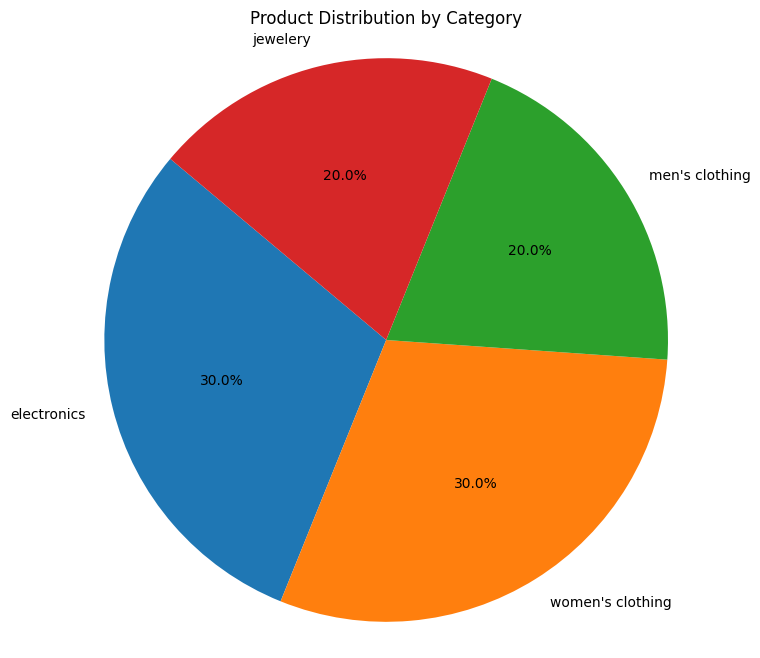

In [66]:
category_group = df['category'].value_counts()  # Count the occurrences of each category

plt.figure(figsize=(8, 8))
plt.pie(category_group, labels=category_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("pie.png")
plt.show()  # Display the plot